Задание
1. Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).

3. Сравнить разные алгоритмы оптимизации.
- Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность.
Используйте параметр `solver`, который может принимать значения:
  - 'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
  - 'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
  - 'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
  - 'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
  - 'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

## 1. Используйте Cancer_Data для классификации.

In [98]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [99]:
# убираем лишнюю колонку
df = df.drop(['id'],axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [100]:
# преобразуем данные (target)
df["diagnosis"] = df["diagnosis"].apply(lambda x: 0 if x=="B" else 1)
# отбрасываем колонку
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [101]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

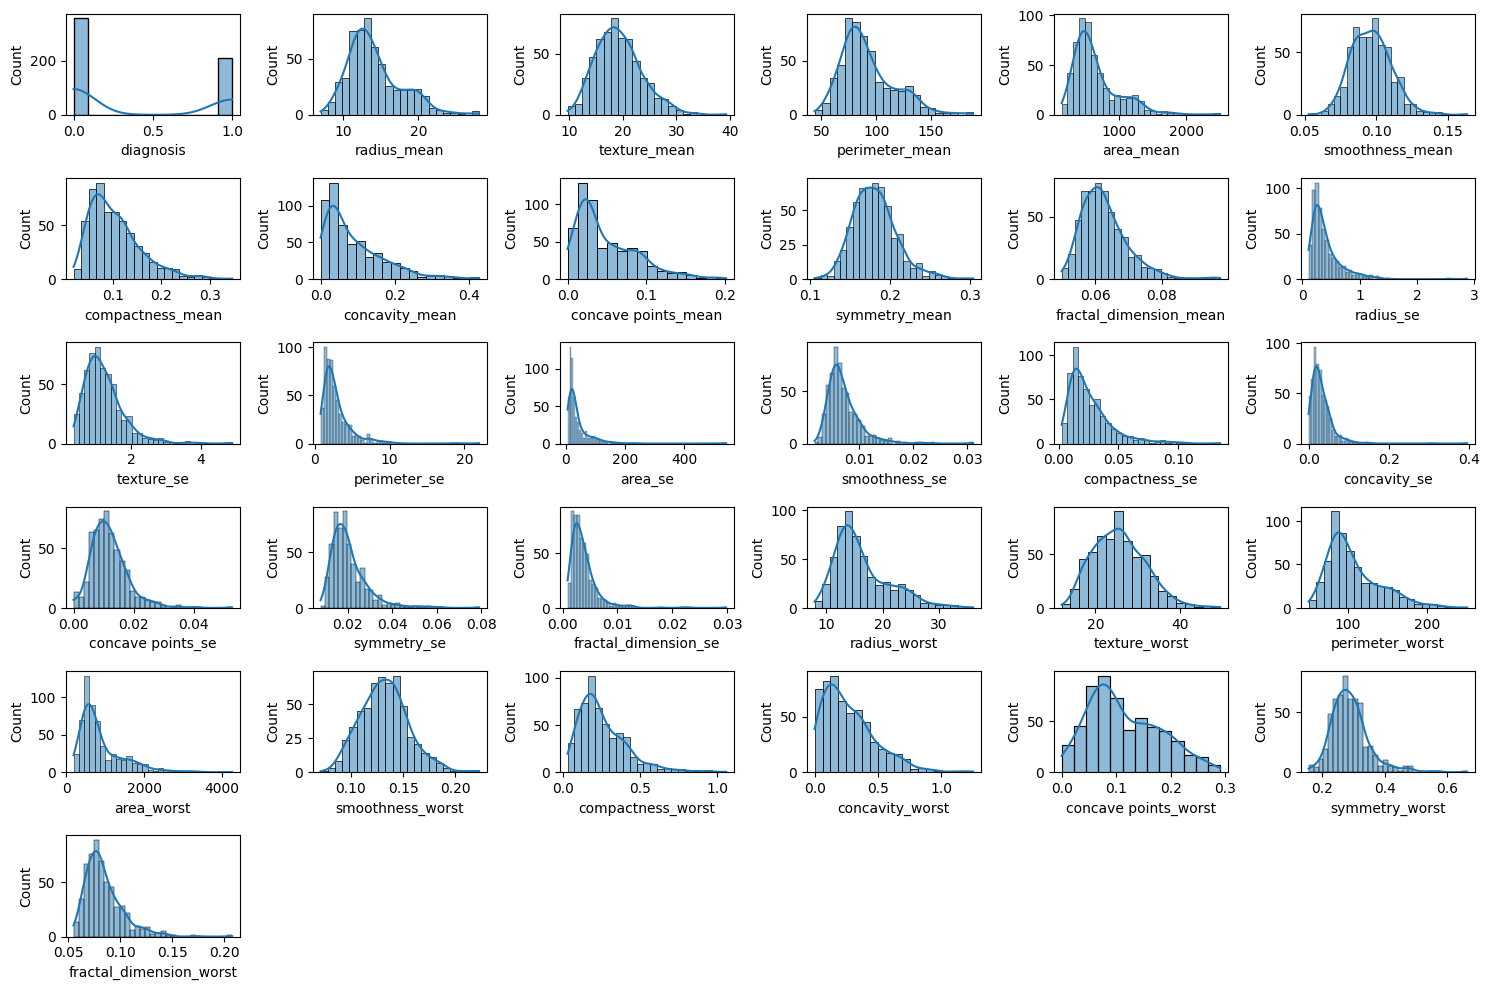

In [102]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], 1):
    plt.subplot(6, 6, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [103]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

## Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
## Запишите и сравните результаты метрик качества и скорости сходимости модели.

In [104]:
# проверяем Логистическую регрессию
lg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)
lg.fit(X_train, y_train)
y_test_pred = lg.predict(X_test)


In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"{accuracy_score(y_test, y_test_pred)=}\n",
      f"{precision_score(y_test, y_test_pred, average='binary', zero_division=1)=}\n",
        f"{recall_score(y_test, y_test_pred, average='binary')=}\n",
    f"{f1_score(y_test, y_test_pred, average='binary')=}\n")

accuracy_score(y_test, y_test_pred)=0.9736842105263158
 precision_score(y_test, y_test_pred, average='binary', zero_division=1)=np.float64(0.9761904761904762)
 recall_score(y_test, y_test_pred, average='binary')=np.float64(0.9534883720930233)
 f1_score(y_test, y_test_pred, average='binary')=np.float64(0.9647058823529412)



### модель логистической регрессии обучилась хорошо и f1 score = 0.96

In [116]:
# создаем нашу модель
import numpy as np
import pandas as pd
import time
import random

class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=100, learn_method='gd', stop_rate=0.001):
        self.epoch = epoch  # количество итераций
        self.learn_method = learn_method  # тип метода обучения
        self.learning_rate = learning_rate  # шаг обучения
        self.stop_rate = stop_rate  # параметр остановки
        self.weights = None  # веса модели
        self.epoch_passed = 0
        self.learn_time = 0

        # Выбор метода обучения
        if self.learn_method == 'gd':
            self.learn_func = self.learn_gd
        elif self.learn_method == 'rmsprop':
            self.learn_func = self.learn_rmsprop
        elif self.learn_method == 'adam':
            self.learn_func = self.learn_adam
        elif self.learn_method == 'nadam':
            self.learn_func = self.learn_nadam
        else:
            raise Exception('Unknown learning method: {}'.format(self.learn_method))

    def init_weights(self, X):
        # Инициализация весов нулями
        # return np.zeros((X.shape[1], 1))
        # инициализируем веса случайным образом
        return np.random.rand(X.shape[1], 1)

    def fit(self, X, Y):
        # Убедимся, что X и Y являются массивами NumPy
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values.reshape(-1, 1)  # Преобразование Y в правильную форму

        X = self.add_ones(X)
        W = self.init_weights(X)

        start = time.perf_counter()
        self.learn_func(X, Y, W)
        self.learn_time = time.perf_counter() - start

    def score(self, X, Y):
        predictions = self.predict(X)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y, pd.Series):
            Y = Y.values.ravel()
        correct_predictions = (predictions == Y).sum()
        # print(np.reshape(predictions, len(Y)))
        return correct_predictions / len(Y)

    def scores(self, X_test, Y_test):
        # accuracy/precision/recall/f1
        r = 3 # rounded
        predictions = self.predict(X_test)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y_test, pd.Series):
            Y = Y_test.values.ravel()
        scores = dict({"accuracy": round(float(accuracy_score(Y, predictions)), r),
                       "recall": round(float(precision_score(Y, predictions, average='binary', zero_division=1)), r),
                       "precision": round(float(recall_score(Y, predictions, average='binary')), r),
                       "f1": round(float(f1_score(Y, predictions, average='binary')), r)})

        return scores

    def n_iter(self):
        return self.epoch_passed

    def time(self):
        return self.learn_time

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = self.add_ones(X)
        return self.sigmoid_linear_regression(X, self.weights)

    def predict(self, X):
        probas = self.predict_proba(X)
        res = (probas > 0.5).astype(int)
        # надо делать reshape т.к. формат вывода неверный: вместо [1,0,1, ..] выдавал [[1], [0], [1] ..]
        return np.reshape(res, len(X))

    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def learn_gd(self, X, Y, W):
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            W -= self.learning_rate * gradients
            self.epoch_passed += 1

        self.weights = W


    def learn_rmsprop(self, X, Y, W):
        cached_rmsprop = np.zeros_like(W)
        decay_rate = 0.9
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            cached_rmsprop = decay_rate * cached_rmsprop + (1 - decay_rate) * gradients ** 2
            W -= (self.learning_rate * gradients) / (np.sqrt(cached_rmsprop) + 1e-6)
            self.epoch_passed += 1

        self.weights = W
    def learn_adam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)
            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)

            W -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W

    def learn_nadam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)

            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)
            m_hat = beta1 * m_corrected + (1 - beta1) * gradients / (1 - beta1 ** t)

            W -= self.learning_rate * m_hat / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W


    def cost_binary_cross_entropy(self, X, Y, W):
        m = X.shape[0]
        h = self.sigmoid_linear_regression(X, W)
        return -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X, W) - Y)

    def sigmoid_linear_regression(self, X, W):
        return 1 / (1 + np.exp(-np.dot(X, W)))



In [123]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000, 10000, 100000]
for coef in c_list:
    mlg = MyLogisticRegression(learning_rate=coef)
    mlg.fit(X_train, y_train)
    pred = mlg.predict(X_test)
    print(f"c={coef}:{mlg.scores(X_test, y_test)}/time={round(mlg.time(), 3)}")
    # print(f"c={coef}:{mlg.score(X_test, y_test)}")
    

c=0.0001:{'accuracy': 0.895, 'recall': 0.816, 'precision': 0.93, 'f1': 0.87}/time=0.013
c=0.001:{'accuracy': 0.947, 'recall': 0.911, 'precision': 0.953, 'f1': 0.932}/time=0.012
c=0.01:{'accuracy': 0.965, 'recall': 0.933, 'precision': 0.977, 'f1': 0.955}/time=0.011
c=0.1:{'accuracy': 0.982, 'recall': 0.977, 'precision': 0.977, 'f1': 0.977}/time=0.011
c=1:{'accuracy': 0.982, 'recall': 0.977, 'precision': 0.977, 'f1': 0.977}/time=0.011
c=10:{'accuracy': 0.956, 'recall': 0.913, 'precision': 0.977, 'f1': 0.944}/time=0.011
c=100:{'accuracy': 0.939, 'recall': 0.875, 'precision': 0.977, 'f1': 0.923}/time=0.012
c=1000:{'accuracy': 0.939, 'recall': 0.875, 'precision': 0.977, 'f1': 0.923}/time=0.016
c=10000:{'accuracy': 0.912, 'recall': 0.824, 'precision': 0.977, 'f1': 0.894}/time=0.014
c=100000:{'accuracy': 0.939, 'recall': 0.875, 'precision': 0.977, 'f1': 0.923}/time=0.013


/tmp/ipykernel_11090/3623436219.py:166: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))
/tmp/ipykernel_11090/3623436219.py:166: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))
/tmp/ipykernel_11090/3623436219.py:166: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))
/tmp/ipykernel_11090/3623436219.py:166: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


### после обучения с различными коэффициентами максимальная точность достигается при коэффициентах == 0.1 и 1

## 2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).



In [132]:
# проверяем с использованием стохастического градиента
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))
r = 3
scores = dict({"accuracy": round(float(accuracy_score(y_test, predictions)), r),
               "recall": round(float(precision_score(y_test, predictions, average='binary', zero_division=1)), r),
               "precision": round(float(recall_score(y_test, predictions, average='binary')), r),
               "f1": round(float(f1_score(y_test, predictions, average='binary')), r)})
print(scores)

0.9649122807017544
{'accuracy': 0.965, 'recall': 0.953, 'precision': 0.953, 'f1': 0.953}


In [133]:
# проверяем Логистическую регрессию
lg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
r = 3
scores = dict({"accuracy": round(float(accuracy_score(y_test, predictions)), r),
               "recall": round(float(precision_score(y_test, predictions, average='binary', zero_division=1)), r),
               "precision": round(float(recall_score(y_test, predictions, average='binary')), r),
               "f1": round(float(f1_score(y_test, predictions, average='binary')), r)})
print(scores)

{'accuracy': 0.974, 'recall': 0.976, 'precision': 0.953, 'f1': 0.965}


#### стохастический классиффикатор показывает худшие результаты

## 3. Сравнить разные алгоритмы оптимизации.
- Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность.
Используйте параметр `solver`, который может принимать значения:
  - 'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
  - 'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
  - 'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
  - 'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
  - 'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.

In [134]:
# проверяем Логистическую регрес
solvers_list = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
for solver in solvers_list:
    lg = LogisticRegression(C=1.0, solver=solver, max_iter=100)
    lg.fit(X_train, y_train)
    predictions = lg.predict(X_test)
    r = 3
    scores = dict({"accuracy": round(float(accuracy_score(y_test, predictions)), r),
                "recall": round(float(precision_score(y_test, predictions, average='binary', zero_division=1)), r),
                "precision": round(float(recall_score(y_test, predictions, average='binary')), r),
                "f1": round(float(f1_score(y_test, predictions, average='binary')), r)})
    print(f"solver {solver}: {scores}")

solver lbfgs: {'accuracy': 0.974, 'recall': 0.976, 'precision': 0.953, 'f1': 0.965}
solver liblinear: {'accuracy': 0.974, 'recall': 0.976, 'precision': 0.953, 'f1': 0.965}
solver newton-cg: {'accuracy': 0.974, 'recall': 0.976, 'precision': 0.953, 'f1': 0.965}
solver newton-cholesky: {'accuracy': 0.974, 'recall': 0.976, 'precision': 0.953, 'f1': 0.965}
solver sag: {'accuracy': 0.982, 'recall': 0.977, 'precision': 0.977, 'f1': 0.977}
solver saga: {'accuracy': 0.991, 'recall': 1.0, 'precision': 0.977, 'f1': 0.988}


/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/user77/Desktop/DSprojects/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### максимальные значения дает оптимизатор "saga"
